In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

root = Path("/root/autodl-tmp/metro-fault-diagnosis")
log_dir = root / "logs"

win_scores   = np.load(log_dir / "metropT_test_window_scores.npy")      # [num_windows]
point_scores = np.load(log_dir / "metropT_test_point_scores.npy")       # [T]
pred_adj     = np.load(log_dir / "metropT_best_pred_adjusted.npy")      # [T] 0/1
label        = np.load(root / "data/processed/MetroPT/test_label.npy")  # [T] 0/1

print(win_scores.shape, point_scores.shape, pred_adj.shape, label.shape)
print("label anomaly ratio:", label.mean())

(95429,) (954384,) (954384,) (954384,)
label anomaly ratio: 0.031385689617596274


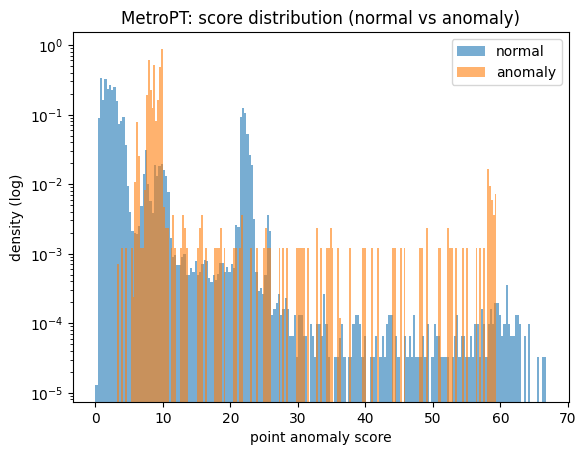

In [5]:
normal = point_scores[label == 0]
anom   = point_scores[label == 1]

plt.figure()
plt.hist(normal, bins=200, alpha=0.6, density=True, label="normal")
plt.hist(anom,   bins=200, alpha=0.6, density=True, label="anomaly")
plt.yscale("log")  # 长尾更清楚
plt.xlabel("point anomaly score")
plt.ylabel("density (log)")
plt.legend()
plt.title("MetroPT: score distribution (normal vs anomaly)")
plt.show()

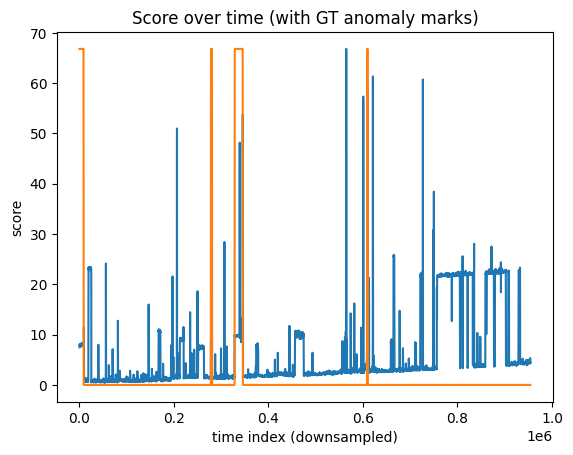

In [6]:
T = len(point_scores)
stride = 200
x = np.arange(0, T, stride)

plt.figure()
plt.plot(x, point_scores[::stride])
plt.plot(x, label[::stride] * point_scores.max())
plt.xlabel("time index (downsampled)")
plt.ylabel("score")
plt.title("Score over time (with GT anomaly marks)")
plt.show()

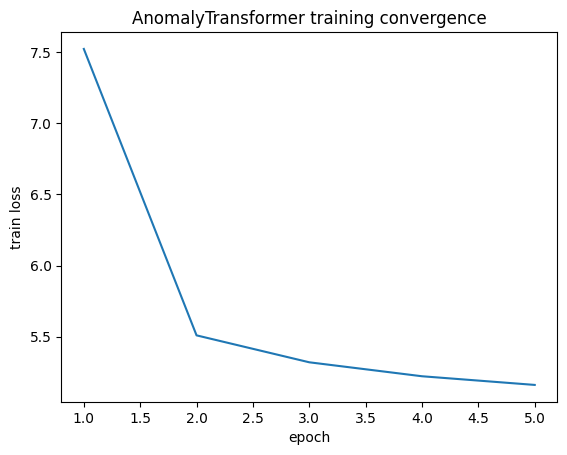

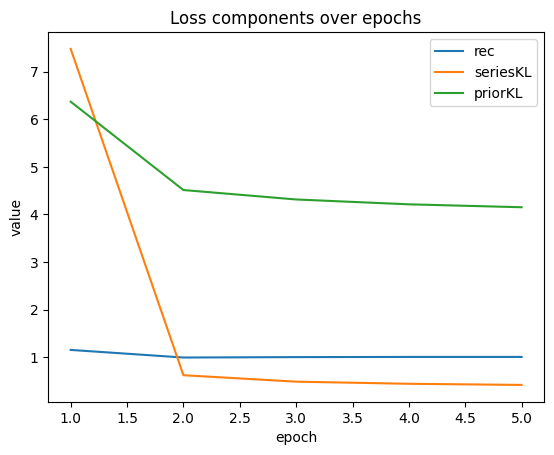

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

root = Path("/root/autodl-tmp/metro-fault-diagnosis")
df = pd.read_csv(root / "logs" / "metropT_train_curve.csv")

plt.figure()
plt.plot(df["epoch"], df["loss"])
plt.xlabel("epoch")
plt.ylabel("train loss")
plt.title("AnomalyTransformer training convergence")
plt.show()

plt.figure()
plt.plot(df["epoch"], df["rec"], label="rec")
plt.plot(df["epoch"], df["seriesKL"], label="seriesKL")
plt.plot(df["epoch"], df["priorKL"], label="priorKL")
plt.xlabel("epoch")
plt.ylabel("value")
plt.title("Loss components over epochs")
plt.legend()
plt.show()